# CS381 Data Analytics Final Project

### Due on 5/13/2020 23:59 pm

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [382]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [383]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [384]:
df = pd.read_csv("adult_income_modified.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [385]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


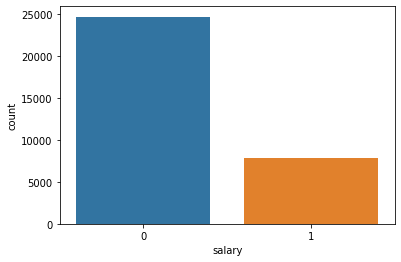

In [282]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

## EDA

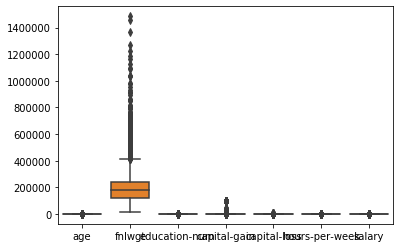

In [283]:
# Check boxplots to visualize if any outliers exist
sns.boxplot(data = df)

In [284]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32571.000000,3.257100e+04,32571.000000,32571.000000,32571.000000,32571.000000,32571.000000
mean,38.599153,1.898091e+05,10.080747,1077.317982,87.435357,40.452151,0.240766
std,13.744795,1.055927e+05,2.572484,7384.182377,403.204587,12.441330,0.427555
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178215e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.371095e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,250.000000,1.484705e+06,16.000000,99999.000000,4356.000000,202.000000,1.000000


In [285]:
#  outliers
outliers = df[(df["fnlwgt"] > 800000) | (df["age"] > 100) |  (df["age"] < 15) | (df["hours-per-week"] > 100) | (df["hours-per-week"] < 5) | (df["capital-gain"] > 80000) | (df["capital-loss"] > 3500)].index
df = df.drop(index=outliers)
# Display mean 
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32219.000000,32219.000000,32219.000000,32219.000000,32219.000000,32219.000000,32219.000000
mean,38.479469,189049.907632,10.068252,591.936590,86.774202,40.562774,0.237779
std,13.557577,102438.875462,2.564730,2554.078346,399.039275,12.098967,0.425730
min,17.000000,12285.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,28.000000,117794.500000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,178383.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,236875.500000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,799281.000000,16.000000,41310.000000,3004.000000,99.000000,1.000000


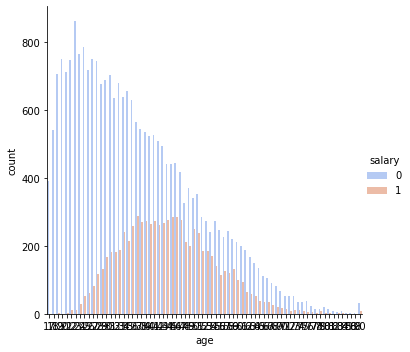

In [286]:
sns.factorplot('age', kind='count', hue='salary', data=df,palette='coolwarm')

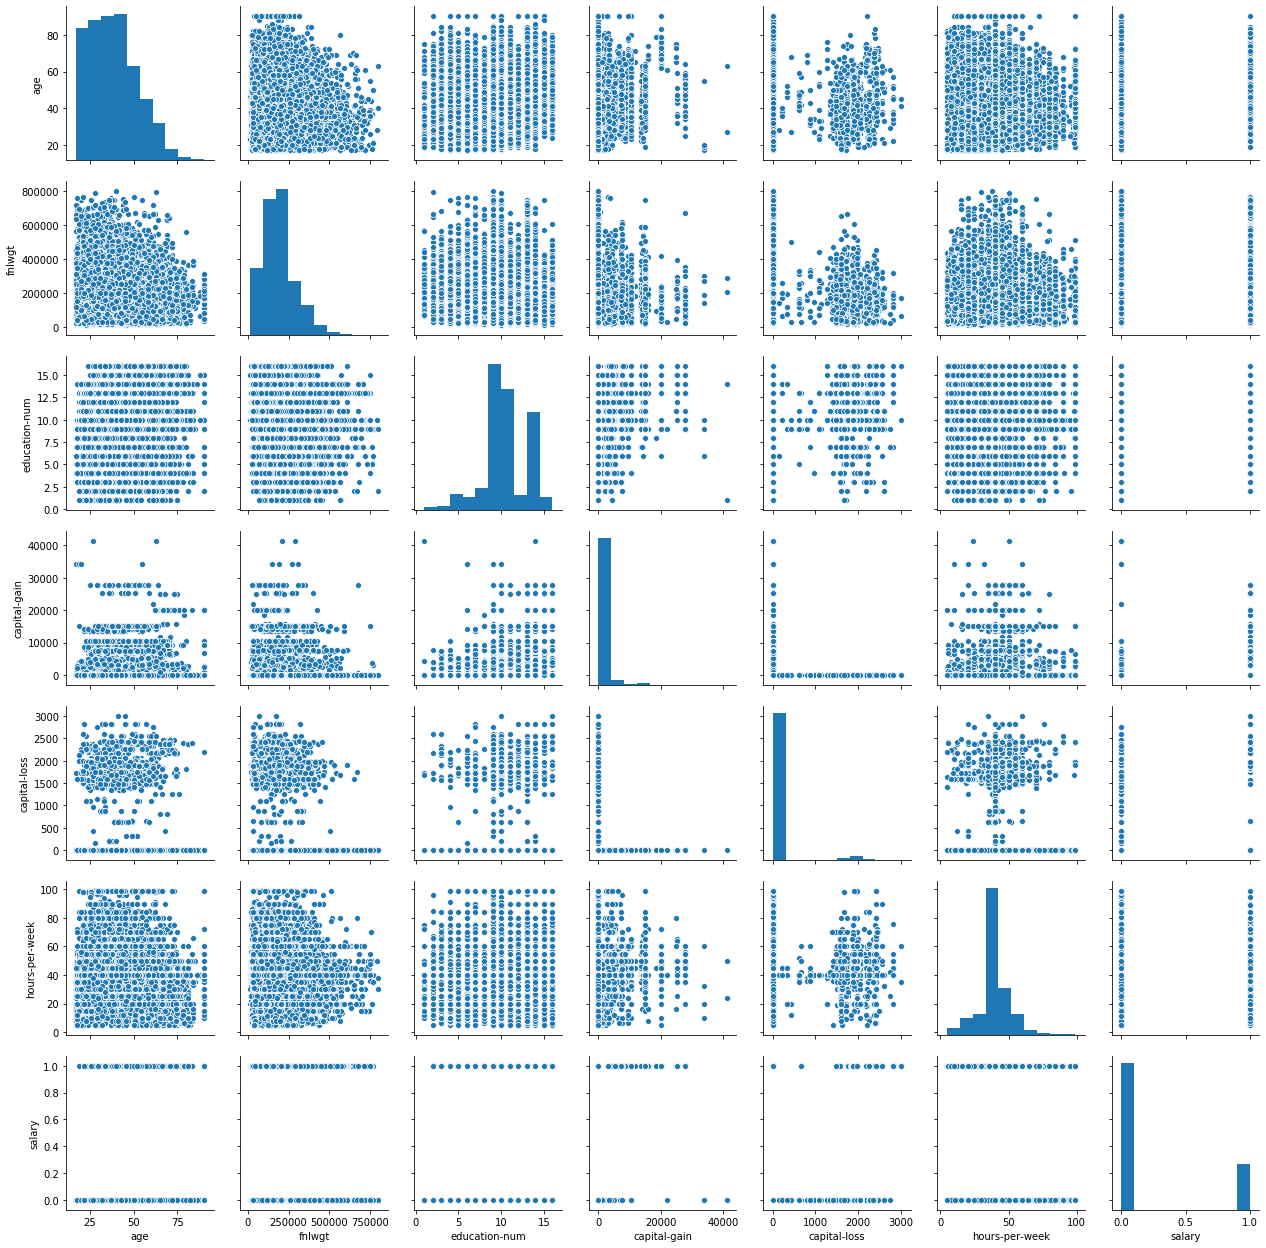

In [287]:
sns.pairplot(df)

In [288]:
# remove NA
df.dropna(inplace=True)
# make sure there is no missing values
df.isnull().sum()
df.drop_duplicates(keep='first', inplace=True) 
# create dummies variable for occupation, sex, workclass, marital_status, relationship, race, edu
sx = pd.get_dummies(df['sex'],drop_first=True)
wkclss = pd.get_dummies(df['workclass'],drop_first=True)
marital = pd.get_dummies(df['marital-status'],drop_first=True)
occ= pd.get_dummies(df['occupation'],drop_first=True)
relationshp = pd.get_dummies(df['relationship'],drop_first=True)
race1 = pd.get_dummies(df['race'],drop_first=True)
edu = pd.get_dummies(df['education'],drop_first=True)
features = ['age', 'capital-gain','capital-loss','hours-per-week','education-num', 'fnlwgt']

In [289]:
df1= df
df1 = pd.concat([df[features], occ, wkclss, edu, sx, marital, relationshp, race1], axis=1)
df1.head()

,age,capital-gain,capital-loss,hours-per-week,education-num,fnlwgt,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,...,Widowed,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White
0,39,2174,0,40,13,77516,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50,0,0,13,13,83311,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,38,0,0,40,9,215646,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,53,0,0,40,7,234721,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,13,338409,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [186]:
X = df1
y = df['salary']
#X =pd.get_dummies(df)
X.head()

,age,capital-gain,capital-loss,hours-per-week,education-num,fnlwgt,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,...,Widowed,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White
0,39,2174,0,40,13,77516,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50,0,0,13,13,83311,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,38,0,0,40,9,215646,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,53,0,0,40,7,234721,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,13,338409,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


### Check logistic regression model accuracy with all features

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7335
           1       0.70      0.25      0.37      2324

    accuracy                           0.79      9659
   macro avg       0.75      0.61      0.63      9659
weighted avg       0.78      0.79      0.76      9659

0.794388653069676


In [411]:
# cross validation
scores = cross_val_score(model, df2, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.81149068 0.81801242 0.8173913  0.80838509 0.81521739 0.80993789
 0.81112147 0.80677229 0.81981982 0.81075202]


### Check logistic regression model accuracy with few features

In [198]:
features1 = ['age', 'capital-gain','capital-loss','education-num']

In [220]:
df2= df
df2 = pd.concat([df[features1], occ, wkclss], axis=1)
df2.head()

,age,capital-gain,capital-loss,education-num,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,...,Tech-support,Transport-moving,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,2174,0,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,0,0,13,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,9,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,53,0,0,7,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,28,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [386]:
X_train, X_test, y_train, y_test = train_test_split(df2,y, test_size=0.30, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7335
           1       0.74      0.35      0.47      2324

    accuracy                           0.81      9659
   macro avg       0.78      0.65      0.68      9659
weighted avg       0.80      0.81      0.79      9659

0.8137488352831556


In [388]:
# cross validation
scores = cross_val_score(model, df2, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.81428571 0.8173913  0.81242236 0.81149068 0.81055901 0.81552795
 0.80552967 0.81733458 0.82292637 0.82162834]


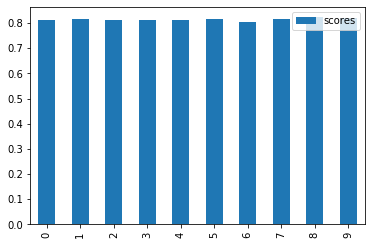

In [399]:
# Plot bar graph of cross validation scores 
plotdata = pd.DataFrame({"scores": [0.81428571, 0.8173913,  0.81242236, 0.81149068, 0.81055901, 0.81552795,0.8055296, 0.81733458, 0.82292637, 0.82162834]})
plotdata.plot(kind="bar")

In [389]:
scores = pd.Series(scores)
scores.mean()

0.8149095977422165

Thats means most features like sex, race, relationship, fnwght, native-country doesnt much effect the model

### with different testing test

In [201]:
 X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, 
                                                    random_state=101)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Trial 1:' )
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

Trial 1:
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      4879
           1       0.69      0.24      0.36      1560

    accuracy                           0.79      6439
   macro avg       0.75      0.60      0.62      6439
weighted avg       0.77      0.79      0.75      6439

0.7900295076875291


# Decision Tree

In [225]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.30, random_state=101)
df2.head()

,age,capital-gain,capital-loss,education-num,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,...,Tech-support,Transport-moving,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,2174,0,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,0,0,13,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,9,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,53,0,0,7,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,28,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [233]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[6491  844]
 [1064 1260]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7335
           1       0.60      0.54      0.57      2324

    accuracy                           0.80      9659
   macro avg       0.73      0.71      0.72      9659
weighted avg       0.80      0.80      0.80      9659

0.8024640231908065


In [404]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[7203  132]
 [1497  827]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      7335
           1       0.86      0.36      0.50      2324

    accuracy                           0.83      9659
   macro avg       0.85      0.67      0.70      9659
weighted avg       0.84      0.83      0.80      9659

0.8313490009317734


In [405]:
scores = cross_val_score(model, df2, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.82546584 0.83540373 0.83198758 0.83198758 0.82919255 0.83447205
 0.82572227 0.83379932 0.83690587 0.83219391]


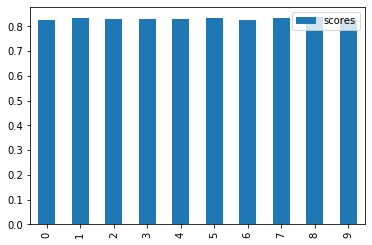

In [406]:
# Plot bar graph of cross validation scores 
plotdata = pd.DataFrame({"scores": [0.82546584, 0.83540373, 0.83198758, 0.83198758, 0.82919255, 0.83447205,
 0.82572227, 0.83379932, 0.83690587, 0.83219391]})
plotdata.plot(kind="bar")

In [407]:
scores = pd.Series(scores)
scores.mean()

0.8317130687975298

# SVM

In [409]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.30, random_state=101)

In [408]:
# Gamma of 10, C of 10
model = svm.SVC(kernel='rbf', gamma=10, C=10)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7335
           1       0.82      0.27      0.40      2324

    accuracy                           0.81      9659
   macro avg       0.81      0.62      0.64      9659
weighted avg       0.81      0.81      0.77      9659

0.8089864375194119


In [410]:
scores = cross_val_score(model, df2, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.81149068 0.81801242 0.8173913  0.80838509 0.81521739 0.80993789
 0.81112147 0.80677229 0.81981982 0.81075202]


In [ ]:
# Plot bar graph of cross validation scores 
#plotdata = pd.DataFrame({"scores": [0.82546584, 0.83540373, 0.83198758, 0.83198758, 0.82919255, 0.83447205,
 #0.82572227, 0.83379932, 0.83690587, 0.83219391]})
#plotdata.plot(kind="bar")

# Random Forest Classifier

In [341]:
df2.head()

,capital-gain,capital-loss,education-num,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,...,Tech-support,Transport-moving,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,2174,0,13,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,13,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,9,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,7,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [334]:
df = df.drop('age',axis=1)
df = df.drop('workclass', axis=1)
df = df.drop('education',axis=1)
df = df.drop('marital-status',axis=1)
df = df.drop('relationship',axis=1)
df = df.drop('race',axis=1)
df = df.drop('native-country',axis=1)
df = df.drop('sex',axis=1)
df = df.drop('occupation',axis=1)
df.head()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
0,77516,13,2174,0,40,<=80K
1,83311,13,0,0,13,<=80K
2,215646,9,0,0,40,<=80K
3,234721,7,0,0,40,<=80K
4,338409,13,0,0,40,<=80K


In [351]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=101)
rfc = RandomForestClassifier(n_estimators=80)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7370
           1       0.72      0.62      0.67      2289

    accuracy                           0.85      9659
   macro avg       0.80      0.77      0.79      9659
weighted avg       0.85      0.85      0.85      9659

0.8522621389377782
